# Squamous cell carcinoma tumor inhibition by Capomulin in mice
* Mice receiving Capomulin showed a 19.5% (+/- 1.22%) reduction of overall squamous cell tumor volume (Fig 1.-Tumor-Response-to-Treatment) compared with a 51.3% (+/- 1.35%) increase in placebo.
* Capomulin reduced the number of metastatic sites when compared with placebo over a 45-day trial (p = 9.66 e-05) (Fig 2. Metastatic Response to Treatment)
* Capomulin increased survival rates in mice over a 45-day trial in comparison with a placebo (84% vs 44%) (Fig. 3 Survival Rates).
* Infubinol and Ketapril showed no significant effect on tumor volume.
* Infubinol showed a small but significant reduction in number of metastatic sites over 45 days (p = 0.0156), but had the worst survival rate (only 36% of the mice receiving Infubinol survived the trial).
* These data suggest that Capomulin is worth further investigation for the treatment of squamous cell carcinoma. 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.cbook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
from scipy import stats
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Study data file locations
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_file, encoding="utf-8")
df_clinic = pd.read_csv(clinical_file, encoding='utf-8')

# Combine the data into a single dataset
df_data = pd.merge(df_mouse, df_clinic, on='Mouse ID')

# Limit the dataset to just the three drugs of interest and placebo
test_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
df_data_drugs = df_data.loc[df_data['Drug'].isin(test_drugs), :]
# Display the data table for preview
df_data_drugs.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


In [3]:
# Group the data by Drug and Timepoint
df_data_dt = df_data_drugs.groupby(['Drug','Timepoint'])


## Scatter plot of each drug treatment over 45-day trial

In [4]:
# This is a failed experiment
# plt.figure.xlabel=('Time (days)')
# marker = itertools.cycle(['s', '^', 'x', 'o']) 
# color = itertools.cycle(['tab:blue', 'tab:green', 'tab:orange', 'tab:red']) 
# for i in test_drugs:
#     ax = df_data_drugs.loc[df_data_drugs['Drug']==i].plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", 
#     marker=next(marker), color=next(color),grid=True, figsize=(10,8), title="Tumor Volume (mm3) over time with " + i)

# plt.show()
# Can't figure out how to adjust limits and labels

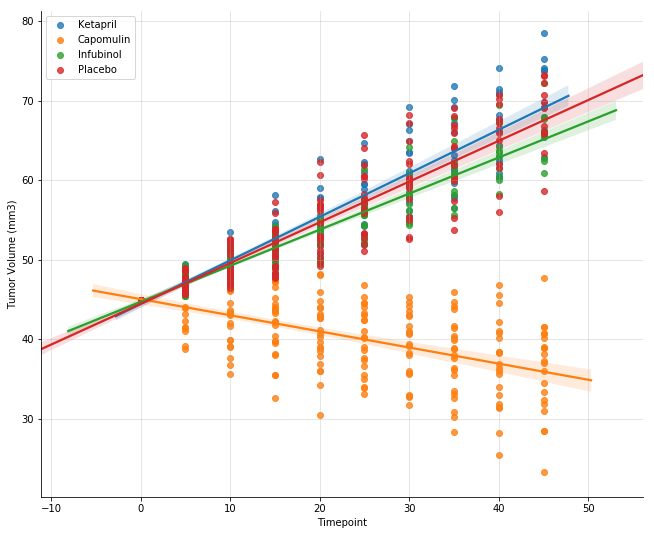

In [5]:
#Doing everything the easy way with Seaborn.
sns.lmplot(data=df_data_drugs, x='Timepoint', y='Tumor Volume (mm3)', hue='Drug', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(20,80)
fig.xlimit=(-5,50)
plt.grid(alpha=0.4)
plt.legend(loc='best')
plt.savefig('seaborn_lmplot.png')

In [6]:
# Custom function for doing plots with different markers for each drug
def dataplot(dataset, errors):
    x = itertools.cycle(['s', '^', 'x', 'o']) 
    y = len(dataset.columns)

    for i in range(0,y):
        chart = dataset.iloc[:, i].plot(yerr=errors, kind='line', figsize=(10,7), marker=next(x))
    return chart
# Custom function for performing a t-test.
def t_test(measure, drug, time):
    grp = df_data_dt.get_group((drug,time))
    placebo = df_data_dt.get_group(('Placebo',time))
    (t_stat, p) = stats.ttest_ind(grp[measure], placebo[measure], equal_var=False) 
    grp_mean = round(grp[measure].mean(),2)
    placebo_mean = round(placebo[measure].mean(),2)
    print(f"Mean {measure} with {drug} at day {time}: {grp_mean} vs placebo {placebo_mean}")
    print(f"The p value for {drug} is {p:.2e}")

    if p < 0.05:
        print(f"***The difference in sample means for {drug} is significant***.\n")
    else:
        print(f"The difference in sample means for {drug} is not significant.\n")
# custom function for outliers calculation and box plot
def outliers(drug, time, measure):
    grp = df_data_dt.get_group((drug,time))
    arr = grp[measure]
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr,75)
    iqr = (q3 - q1)
    lower_boundary = q1 - (1.5 * iqr)
    upper_boundary = q3 + (1.5 * iqr)
    low = arr[arr <= lower_boundary]
    high = arr[arr >= upper_boundary]
    #Check for outliers and do a box plot or scatter?
    if len(low) or len(high) >0:
        if len(low) >0:
            print(f"There is/are {len(low)} outlier(s) below the lower boundary {low}")
        elif len(high) >0:
            print(f"There is/are {len(low)} outlier(s) below the lower boundary {high}")
        plt.boxplot(arr, showmeans=True)
        plt.grid()
        plt.show()

    else:
        print("There are no outliers in this series.")

In [7]:
# Find mean, median and standard error for Tumor Volume using grouped dataset 
medians = df_data_dt['Tumor Volume (mm3)'].median()
means = df_data_dt['Tumor Volume (mm3)'].mean()
errors = df_data_dt['Tumor Volume (mm3)'].sem()
#Then create dataframes for plotting
df_means = means.unstack().transpose()
df_errors = errors.unstack().transpose()
df_medians = medians.unstack().transpose()

df_means

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


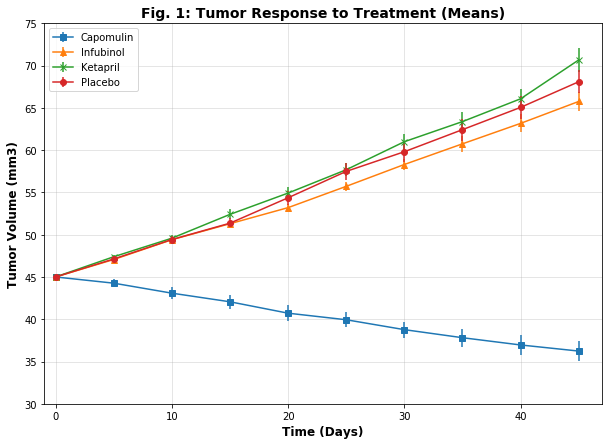

In [8]:
# Generate the Plot (with Error Bars) using the defined function above (the hard way)
dataplot(df_means, df_errors)

plt.title('Fig. 1: Tumor Response to Treatment (Means)', fontsize=14, fontweight="bold")
plt.xlabel('Time (Days)', fontsize=12, fontweight="bold")
plt.ylabel('Tumor Volume (mm3)', fontsize=12, fontweight="bold")
plt.legend(loc='best')

# Adjust the limites and grid
plt.xlim(-1,47)
plt.ylim(30, 75)
plt.grid(alpha=0.4)
# Save the Figure
plt.savefig('tumor_response.png')
# Show the Figure
plt.show()

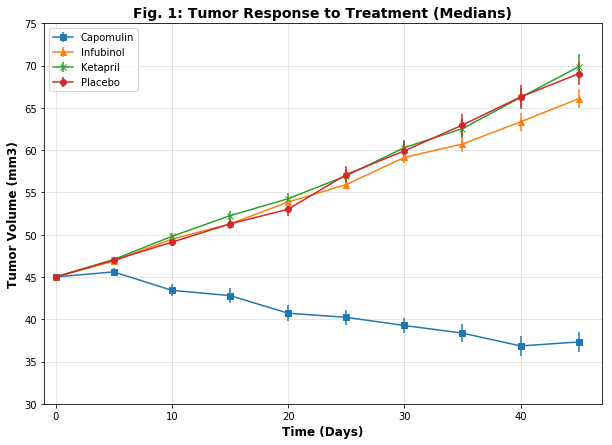

In [9]:
# Generate the Plot (with Error Bars) using the defined function above (the hard way)
dataplot(df_medians, df_errors)

plt.title('Fig. 1: Tumor Response to Treatment (Medians)', fontsize=14, fontweight="bold")
plt.xlabel('Time (Days)', fontsize=12, fontweight="bold")
plt.ylabel('Tumor Volume (mm3)', fontsize=12, fontweight="bold")
plt.legend(loc='best')

# Adjust the limites and grid
plt.xlim(-1,47)
plt.ylim(30, 75)
plt.grid(alpha=0.4)
# Save the Figure
plt.savefig('tumor_response-m.png')
# Show the Figure
plt.show()

### Fig 1. Tumor Response to Treatment
Groups of 25 mice were treated with one of three test drugs: Capomulin (blue square), Infubinol (orange diamond), Katapril (green x) or placebo (red dot).
Mice given Capomulin showed a 19.5% reduction in tumor volume (mean) over the trial, compared with a 51.3% increase in the placebo group.


In [10]:
# Run a t-test on the day 45 result for drugs vs. placebo using custom method for t-test, outliers
for x in test_drugs:
    
    t_test('Tumor Volume (mm3)', x, 45)
    outliers(x, 45, 'Tumor Volume (mm3)')


Mean Tumor Volume (mm3) with Capomulin at day 45: 36.24 vs placebo 68.08
The p value for Capomulin is 1.93e-15
***The difference in sample means for Capomulin is significant***.

There are no outliers in this series.
Mean Tumor Volume (mm3) with Infubinol at day 45: 65.76 vs placebo 68.08
The p value for Infubinol is 2.05e-01
The difference in sample means for Infubinol is not significant.

There are no outliers in this series.
Mean Tumor Volume (mm3) with Ketapril at day 45: 70.66 vs placebo 68.08
The p value for Ketapril is 2.09e-01
The difference in sample means for Ketapril is not significant.

There are no outliers in this series.
Mean Tumor Volume (mm3) with Placebo at day 45: 68.08 vs placebo 68.08
The p value for Placebo is 1.00e+00
The difference in sample means for Placebo is not significant.

There are no outliers in this series.


## T-test on Tumor Volume change over 45 days drugs vs. placebo
* Capomulin shows significant reduction in tumor volume over 45 day treatment compared to placebo
* Capomulin showed a marked reduction in tumor volume compared with placebo, with a p value of 1.93e-15.
* Infubinol showed no significant reduction in tumor volume compared with placebo (p = 0.2)

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Also grab the errors in a separate dataframe
mms_medians = df_data_dt['Metastatic Sites'].mean().unstack().transpose()
mms_means = df_data_dt['Metastatic Sites'].mean().unstack().transpose()
mms_errors = df_data_dt['Metastatic Sites'].sem().unstack().transpose()
mms_means

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


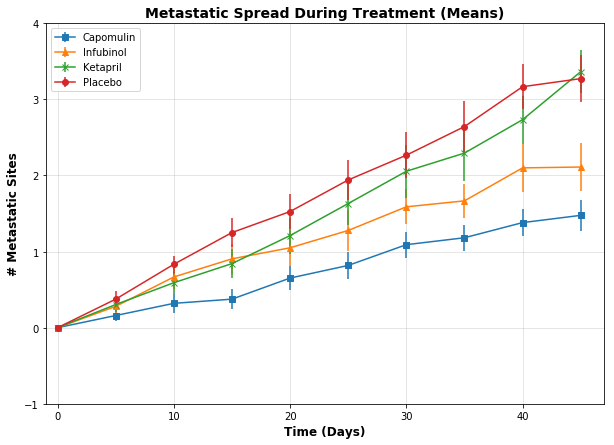

In [12]:
# Generate the Plot (with Error Bars) using custom dataplot function
dataplot(mms_means, mms_errors)

# Give plot labels, title
plt.title('Metastatic Spread During Treatment (Means)', fontsize=14, fontweight="bold")
plt.xlabel('Time (Days)', fontsize=12, fontweight="bold")
plt.ylabel('# Metastatic Sites', fontsize=12, fontweight="bold")
plt.legend(loc='best')
# Add grid, limits
plt.grid(alpha=0.4)
plt.xlim(-1,47)
plt.ylim(-1, 4)
# Save the Figure
plt.savefig('metastatic_response.png')
# Show the Figure
plt.show()

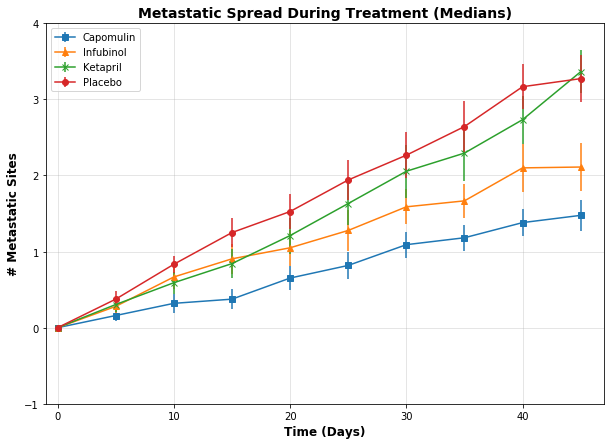

In [13]:
# Generate the Plot (with Error Bars) using custom dataplot function
dataplot(mms_medians, mms_errors)

# Give plot labels, title
plt.title('Metastatic Spread During Treatment (Medians)', fontsize=14, fontweight="bold")
plt.xlabel('Time (Days)', fontsize=12, fontweight="bold")
plt.ylabel('# Metastatic Sites', fontsize=12, fontweight="bold")
plt.legend(loc='best')
# Add grid, limits
plt.grid(alpha=0.4)
plt.xlim(-1,47)
plt.ylim(-1, 4)
# Save the Figure
plt.savefig('metastatic_response-m.png')
# Show the Figure
plt.show()

### Fig 2. Metastatic Response to Treatment
The mean number of metastatic sites is shown charted for each timepoint in the Capomulin, Infubinol, Ketapril and Placebo groups at day 45.

Capomulin-treated mice showed a decreased number of metasteses compared with placebo. Infubinol-treated mice also showed a decrease in mean metastatic sites compared with placebo at date 45.


Mean Metastatic Sites with Capomulin at day 45: 1.48 vs placebo 3.27
The p value for Capomulin is 9.66e-05
***The difference in sample means for Capomulin is significant***.

There are no outliers in this series.
Mean Metastatic Sites with Infubinol at day 45: 2.11 vs placebo 3.27
The p value for Infubinol is 1.55e-02
***The difference in sample means for Infubinol is significant***.

There are no outliers in this series.
Mean Metastatic Sites with Ketapril at day 45: 3.36 vs placebo 3.27
The p value for Ketapril is 8.28e-01
The difference in sample means for Ketapril is not significant.

There are no outliers in this series.
Mean Metastatic Sites with Placebo at day 45: 3.27 vs placebo 3.27
The p value for Placebo is 1.00e+00
The difference in sample means for Placebo is not significant.

There is/are 1 outlier(s) below the lower boundary 1803    1
Name: Metastatic Sites, dtype: int64


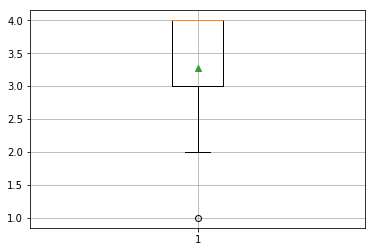

In [14]:
for x in test_drugs:
    t_test('Metastatic Sites', x, 45)
    outliers(x, 45, 'Metastatic Sites')

## T-test on Metastatic Sites between test drugs and placebo
 * The Capomulin group of mice showed a significant decrease in the number of metastatic sites when compared with placebo (9.66e-05)
 * There was a small but significant decrease in the Infubinol group (1.55e-02)
 * There was one outlier in the placebo group that only had one metastatic site.

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint
survival = df_data_dt['Mouse ID'].count().unstack().transpose()

# Calculate the percentage survived over time, referencing the first row as starting population

zeros = survival.iloc[0]
for i in range(0,len(survival)):
    survival.iloc[i] = survival.iloc[i].divide(zeros).multiply(100)
survival

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


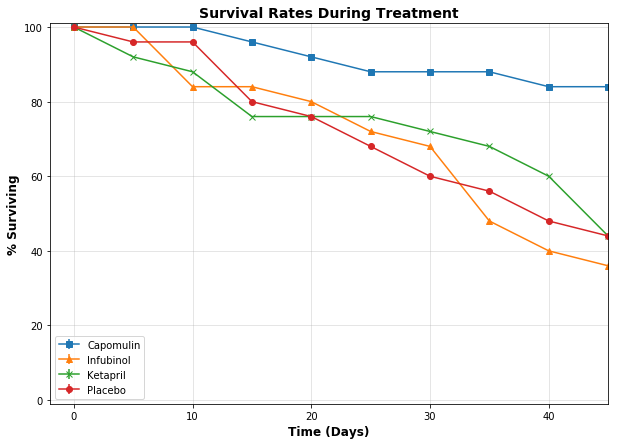

In [16]:
# Generate the Plot using the custom function dataplot (above), ignoring error
errors = 0
dataplot(survival, errors)
# Give the plot a title, labels
plt.title('Survival Rates During Treatment', fontsize=14, fontweight="bold")
plt.xlabel('Time (Days)',fontsize=12, fontweight="bold")
plt.ylabel('% Surviving',fontsize=12, fontweight="bold")
plt.legend(loc='best')

#Adjust limits, grid
plt.grid(alpha=0.4)
plt.xlim(-2, 45)
plt.ylim(-1, 101)

# Save the Figure
plt.savefig('survival_rates.png')

# Show the Figure
plt.show()

### Fig. 3 Survival rate after 45 days drugs vs. placebo
* Capomulin-treated mice showed increased rates of survival over 45-days compared with placebo. 
* Ketapril, Infubinol, did show increased rates of survival.
* Infubinol's small decrease in metastatic sites did not translate into better outcomes in survival

In [17]:
# Calculate the percent changes for each drug

pct_change = df_means.iloc[9].subtract(df_means.iloc[0])/df_means.iloc[0]*100
pct_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

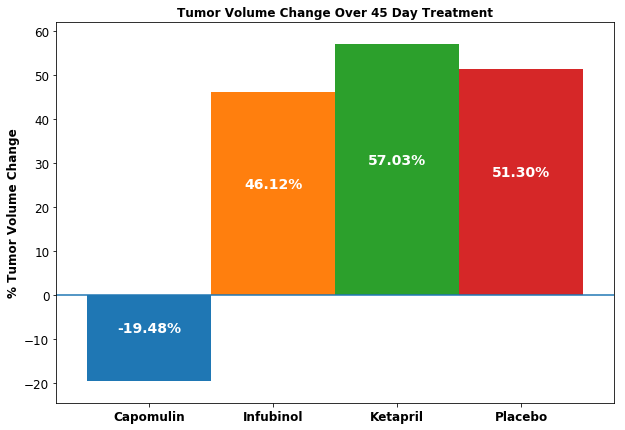

In [18]:
fig, ax = plt.subplots()
# Setting a custom color palette
colors = np.array(['tab:blue','tab:orange','tab:green','tab:red'])
pct_change.plot(kind='bar', figsize=(10,7), align="center", color=colors, width=1, fontsize=12)

# Putting the percent change on the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height() + '%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='white', 
            fontsize=14, fontweight='bold')

    
# Prettifying the plot
plt.xticks(rotation=0, fontweight='bold')
plt.axhline(y=0)
plt.ylim(pct_change.min()-5, pct_change.max() + 5)

# Adding plot labels, ignoring the x-axis to make it less busy
plt.xlabel('')
plt.ylabel("% Tumor Volume Change", fontsize=12, fontweight='bold')
plt.title("Tumor Volume Change Over 45 Day Treatment", fontsize=12, fontweight="bold")

# Show the Figure
plt.show()
fig.savefig('Tumor_Volume_change.png')

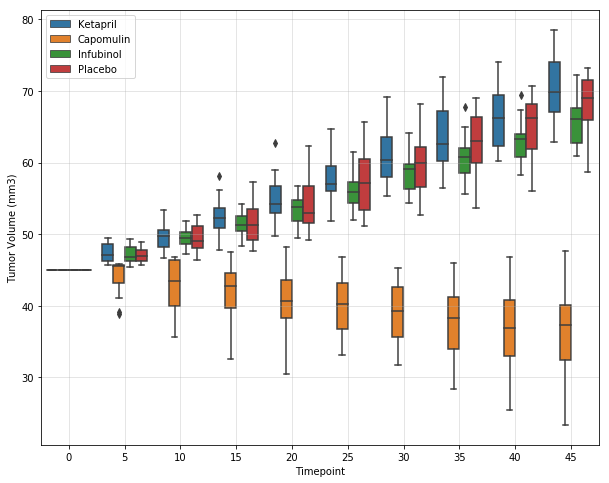

In [19]:
# Double-checking that there aren't any outliers skewing the data. 

sns.boxplot(data=df_data_drugs, x='Timepoint', y='Tumor Volume (mm3)', hue='Drug')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(20,80)
fig.xlimit=(-5,50)
plt.grid(alpha=0.4)
plt.legend(loc='best')
plt.savefig('seaborn_lmplot_tumor_vol.png')

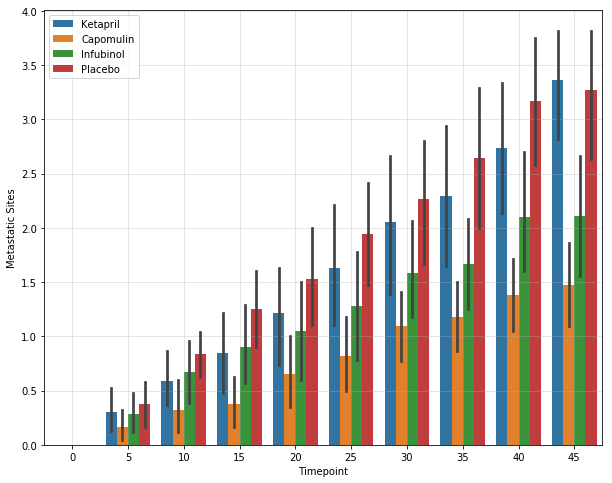

In [30]:
# Another way to view the metastatic site data

sns.barplot(data=df_data_drugs, x='Timepoint', y='Metastatic Sites', hue='Drug')
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.grid(alpha=0.4)
plt.legend(loc='best')
plt.savefig('seaborn_barplot_ms.png')